<a href="https://colab.research.google.com/github/SithmiDesilva/House_Price_Prediction/blob/Backend/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Import all the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **1. Load and Explore the Dataset**

In [11]:
# Define column names as a list instead of a set
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Read the CSV file using the ordered list of column names
data = pd.read_csv('/content/drive/MyDrive/Codveda Technologies/House_Price_Prediction/4) house Prediction Data Set.csv',
                   delim_whitespace=True, header=None, names=column_names)

data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
#Convert 'Age' from float to int data type
data['AGE'] = data['AGE'].astype(int)

In [13]:
#Data after converting 'age' to int
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
#Check for null values
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### **2. Exploratory Data Analysis**

In [15]:
#Check for more information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    int64  
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [16]:
#Statistical description of numerical variables
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.156126,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.203316,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.000000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.000000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.000000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


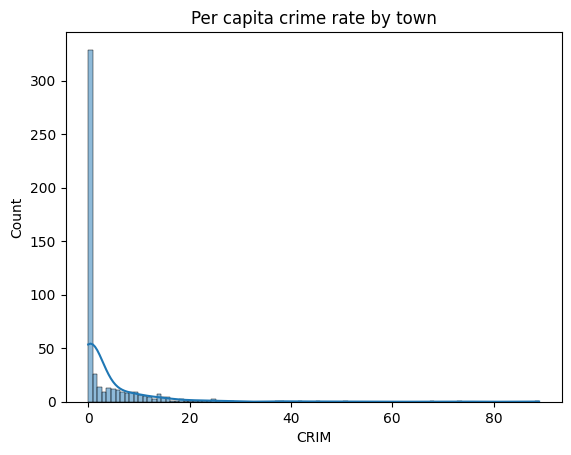

In [17]:
# Distribution of Per capita crime rate by town
sns.histplot(data['CRIM'], kde=True)
plt.title("Per capita crime rate by town")
plt.show()

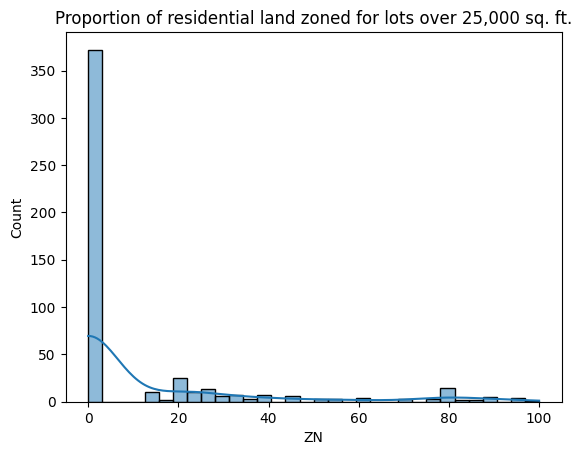

In [18]:
# Distribution of Proportion of residential land zoned for lots over 25,000 sq. ft
sns.histplot(data['ZN'], kde=True)
plt.title("Proportion of residential land zoned for lots over 25,000 sq. ft.")
plt.show()

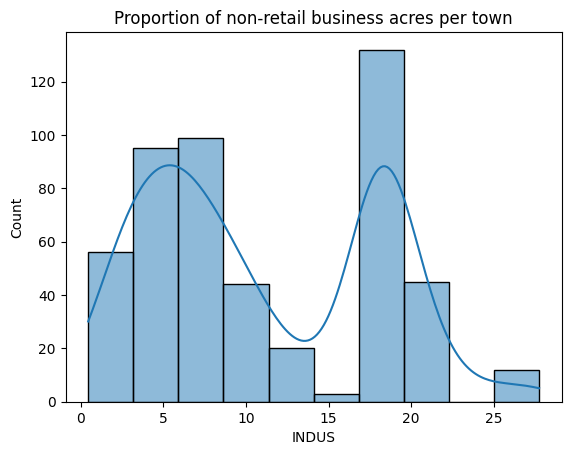

In [19]:
# Distribution of Proportion of non-retail business acres per town
sns.histplot(data['INDUS'], kde=True)
plt.title("Proportion of non-retail business acres per town")
plt.show()

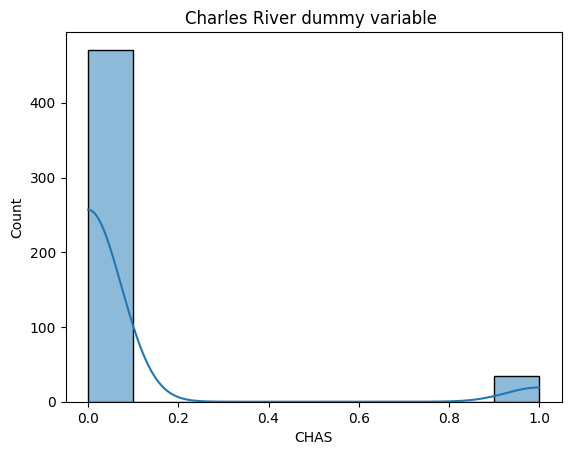

In [20]:
# Distribution of Charles River dummy variable
sns.histplot(data['CHAS'], kde=True)
plt.title("Charles River dummy variable ")
plt.show()

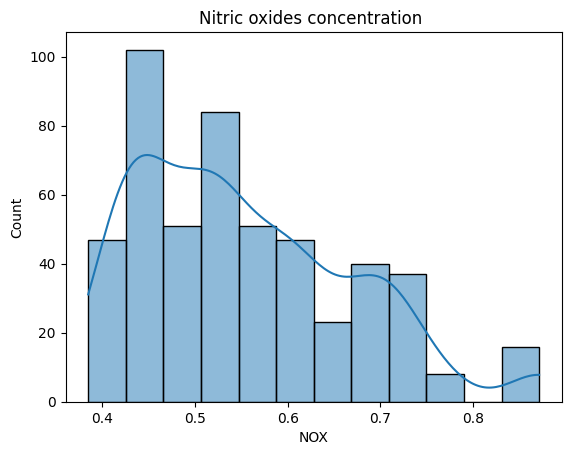

In [21]:
# Distribution of Nitric oxides concentration
sns.histplot(data['NOX'], kde=True)
plt.title("Nitric oxides concentration ")
plt.show()

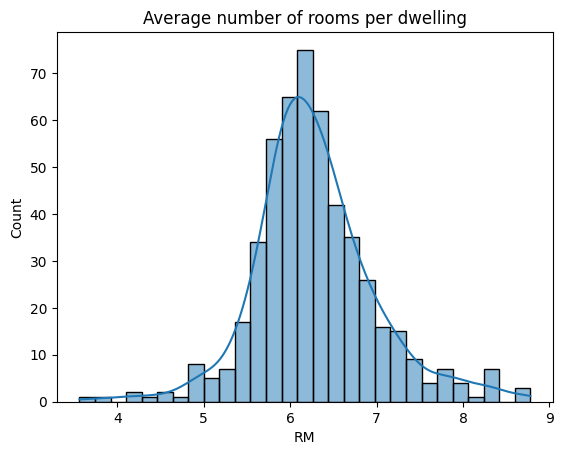

In [22]:
# Distribution of Average number of rooms per dwelling
sns.histplot(data['RM'], kde=True)
plt.title("Average number of rooms per dwelling")
plt.show()

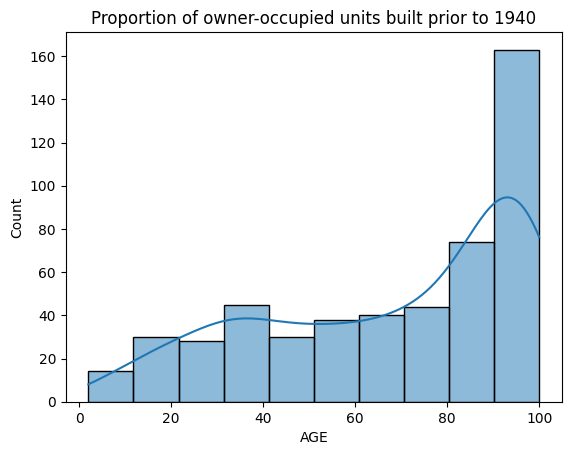

In [23]:
# Distribution of Proportion of owner-occupied units built prior to 1940
sns.histplot(data['AGE'], kde=True)
plt.title("Proportion of owner-occupied units built prior to 1940")
plt.show()

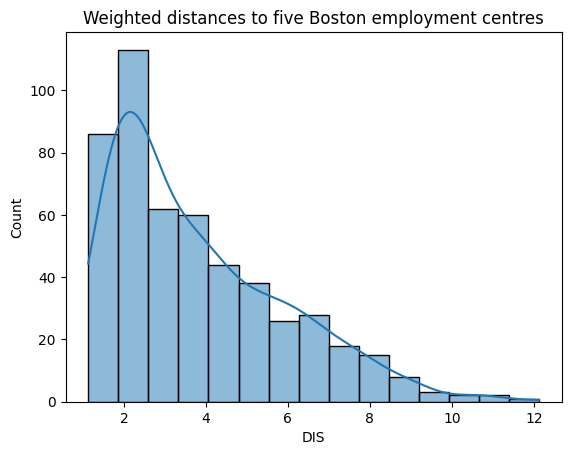

In [24]:
# Distribution of Weighted distances to five Boston employment centres
sns.histplot(data['DIS'], kde=True)
plt.title("Weighted distances to five Boston employment centres")
plt.show()

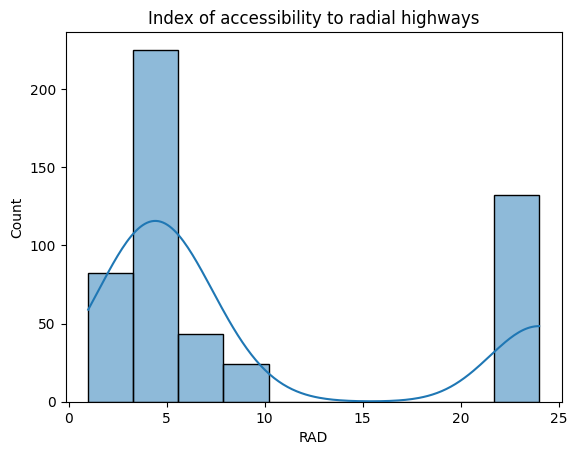

In [25]:
# Distribution of Index of accessibility to radial highways
sns.histplot(data['RAD'], kde=True)
plt.title("Index of accessibility to radial highways")
plt.show()

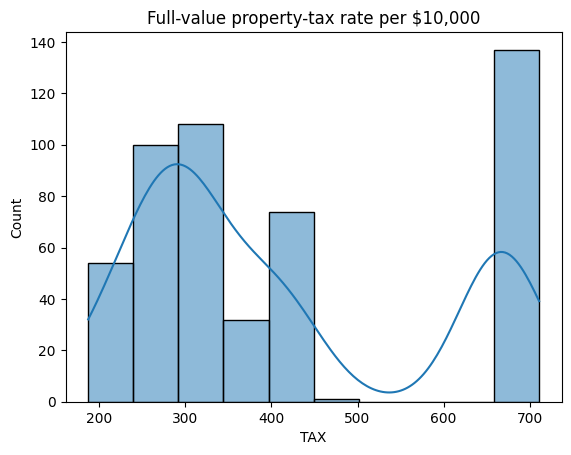

In [26]:
# Distribution of Full-value property-tax rate per $10,000
sns.histplot(data['TAX'], kde=True)
plt.title("Full-value property-tax rate per $10,000")
plt.show()

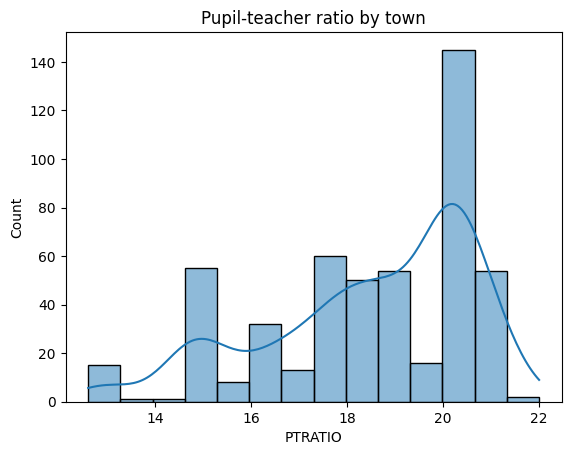

In [27]:
# Distribution of Pupil-teacher ratio by town
sns.histplot(data['PTRATIO'], kde=True)
plt.title("Pupil-teacher ratio by town")
plt.show()

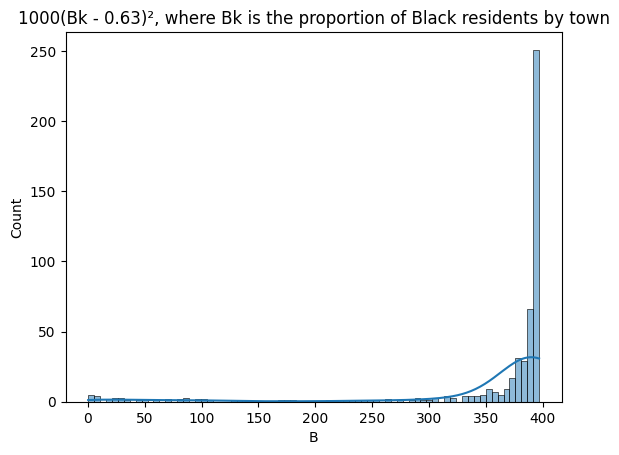

In [28]:
# Distribution of 1000(Bk - 0.63)², where Bk is the proportion of Black residents by town
sns.histplot(data['B'], kde=True)
plt.title("1000(Bk - 0.63)², where Bk is the proportion of Black residents by town")
plt.show()

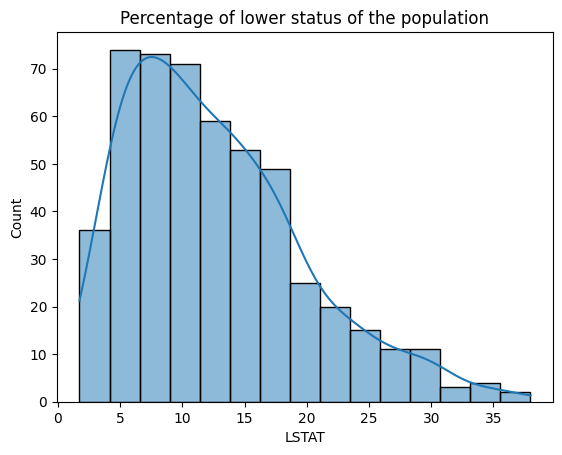

In [29]:
# Distribution of Percentage of lower status of the population
sns.histplot(data['LSTAT'], kde=True)
plt.title("Percentage of lower status of the population")
plt.show()

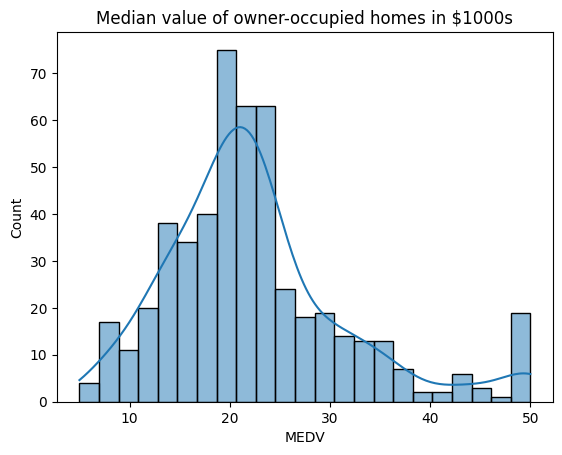

In [30]:
# Distribution of target variable
sns.histplot(data['MEDV'], kde=True)
plt.title("Median value of owner-occupied homes in $1000s")
plt.show()

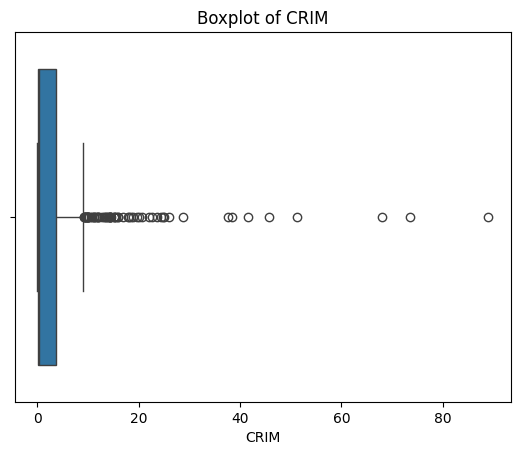

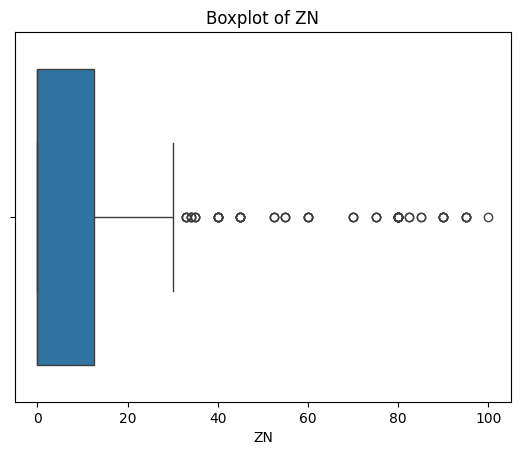

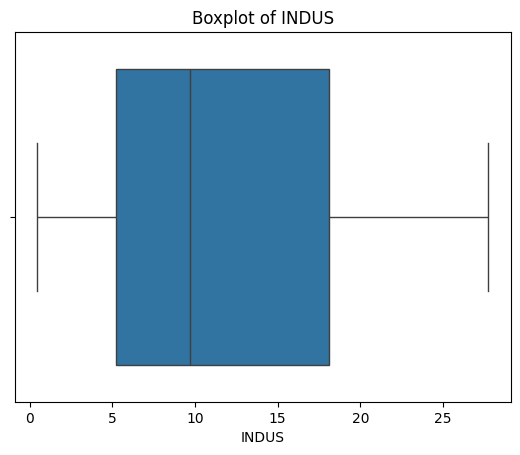

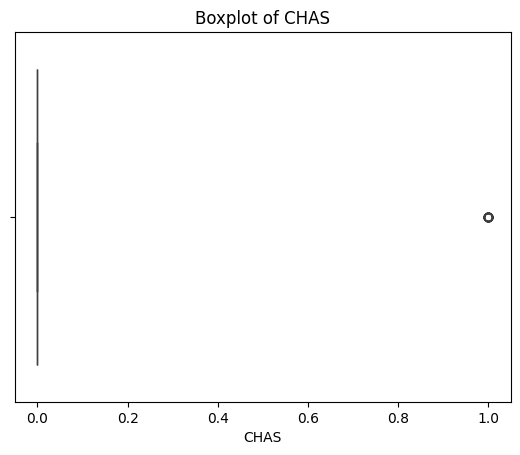

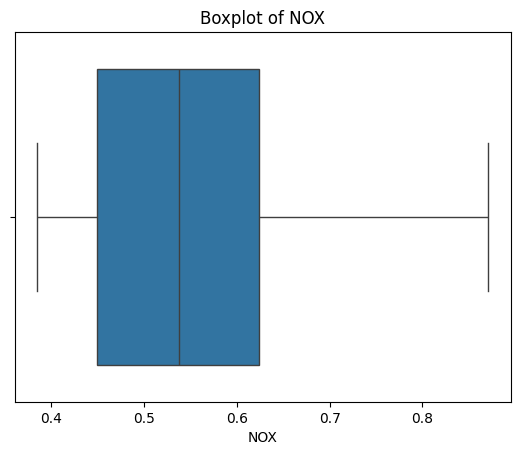

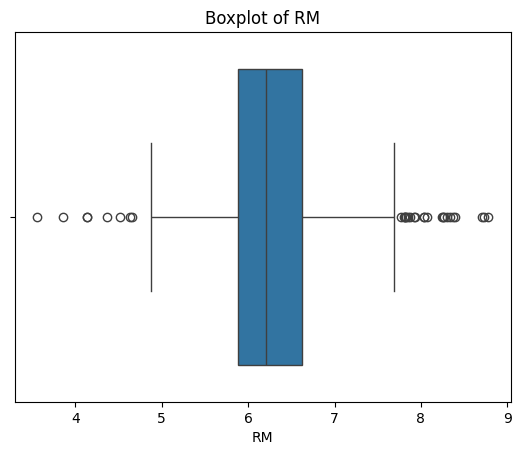

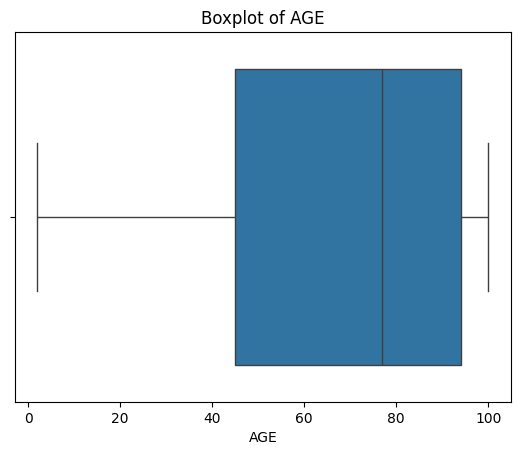

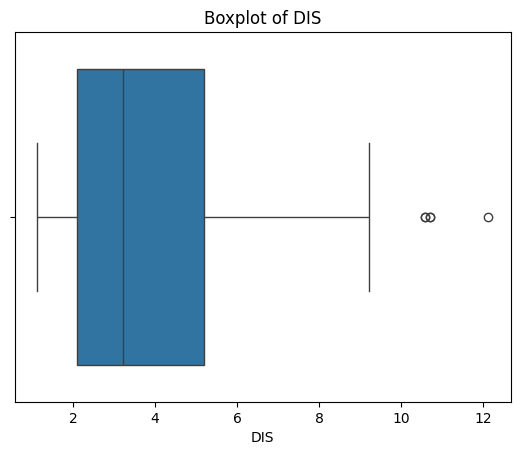

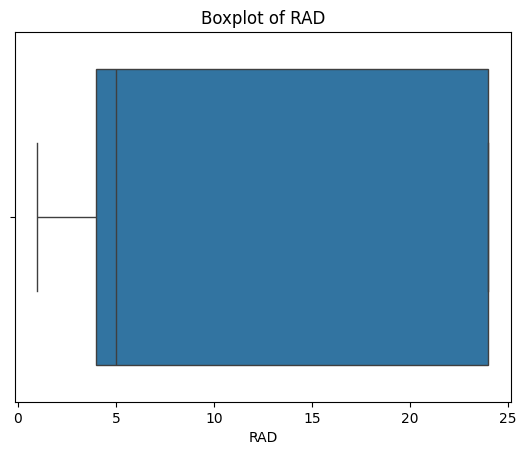

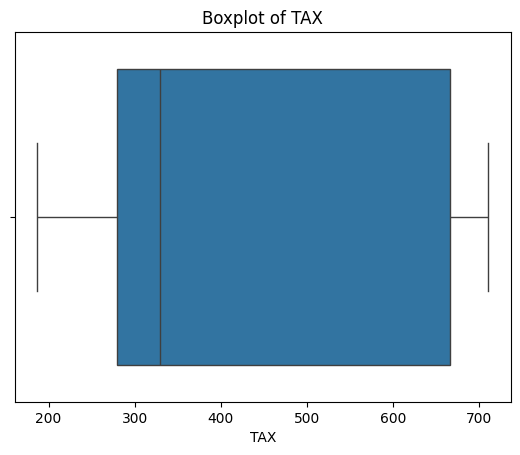

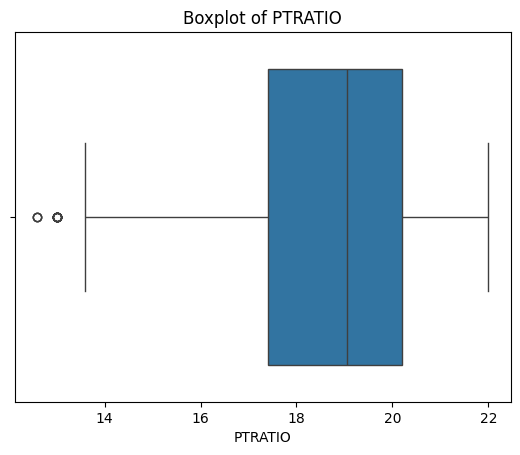

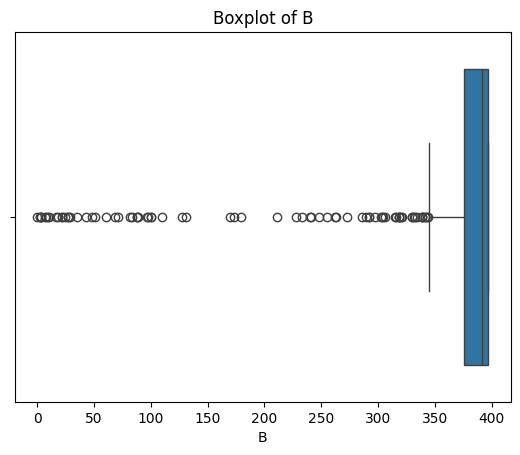

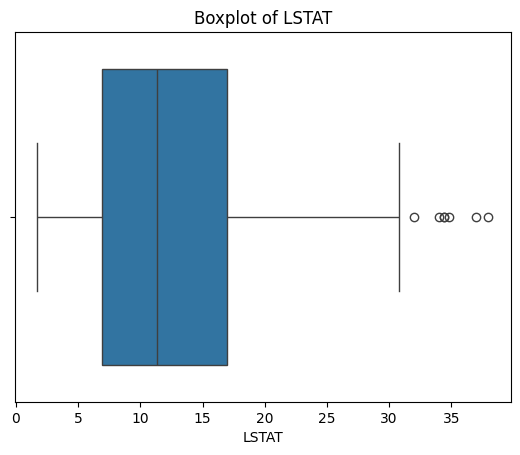

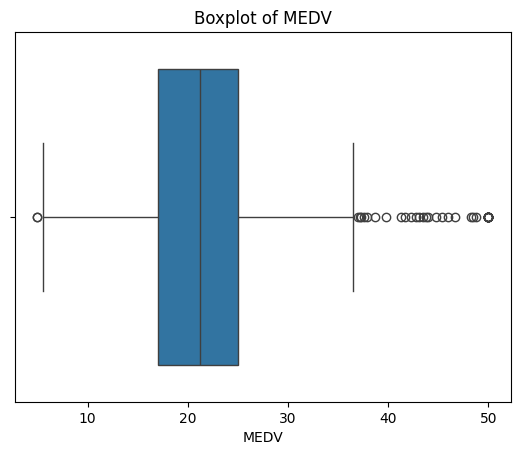

In [31]:
# Boxplots to detect outliers
for col in column_names:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

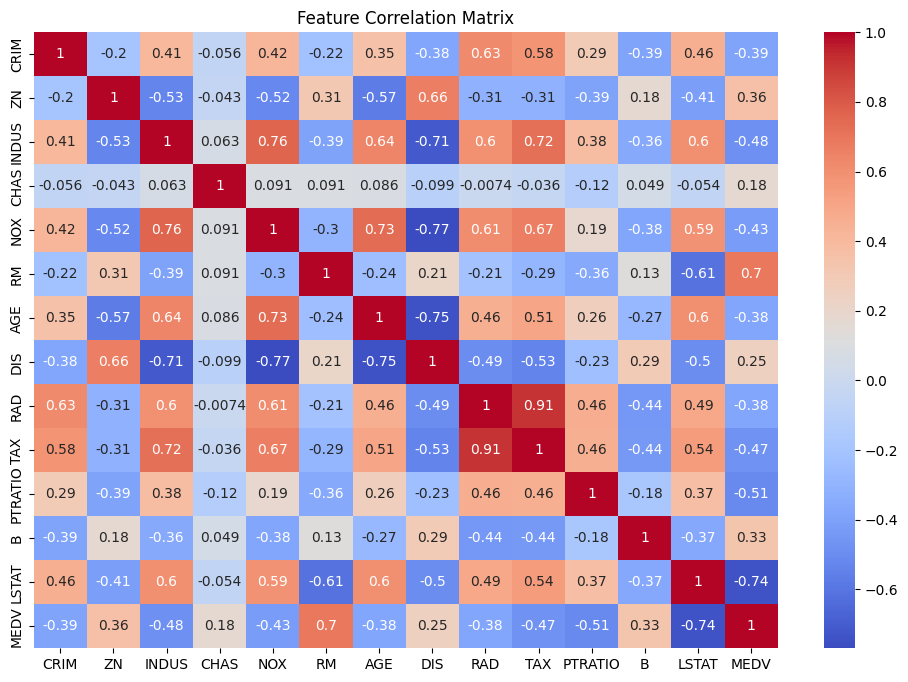

In [32]:
#Feature correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


Original shape: (506, 14)
Shape after outlier treatment: (506, 14)


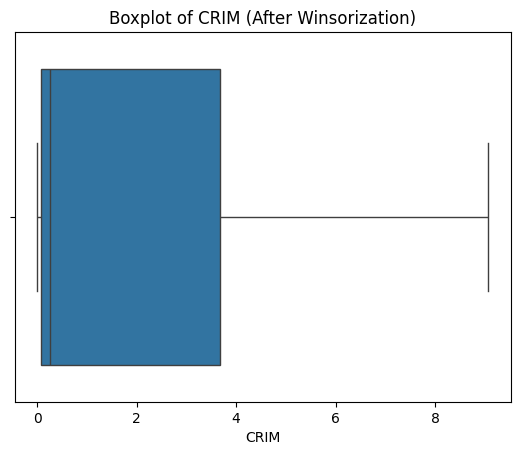

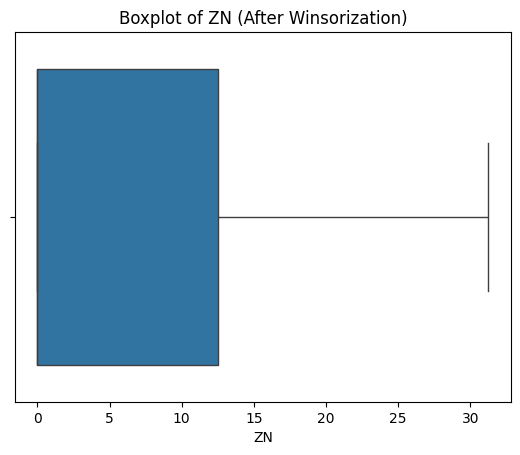

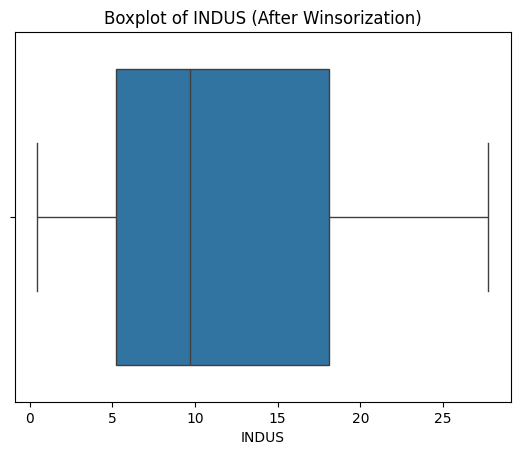

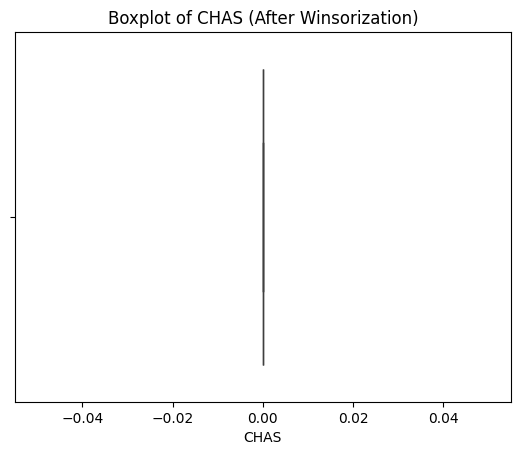

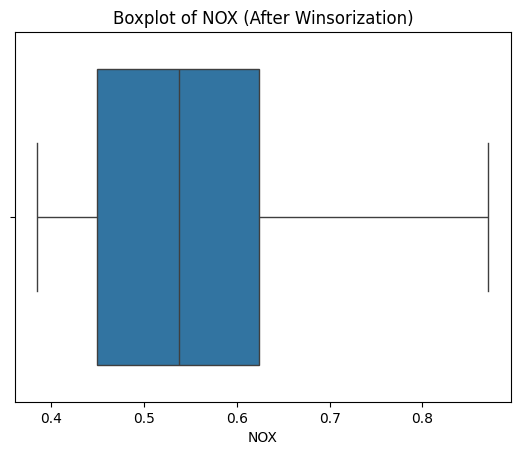

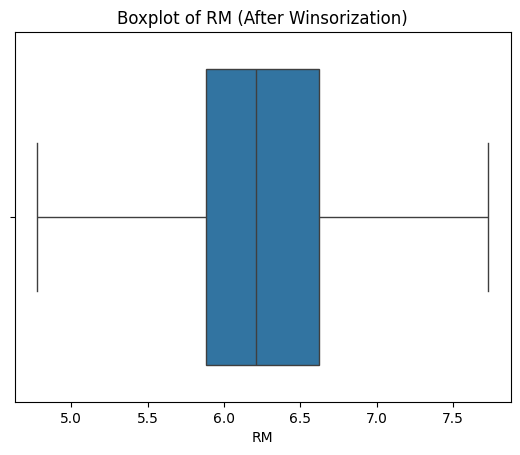

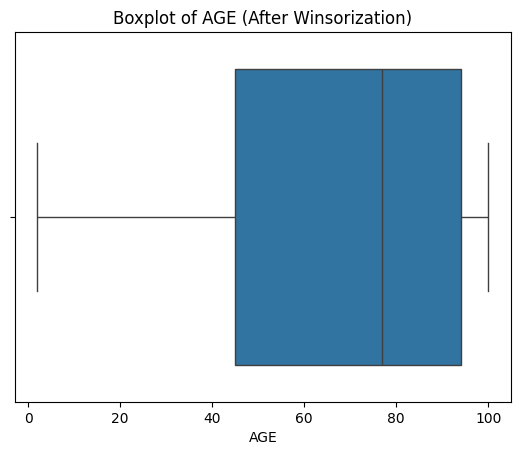

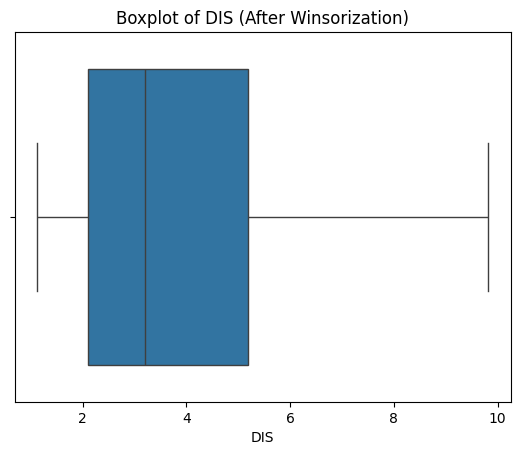

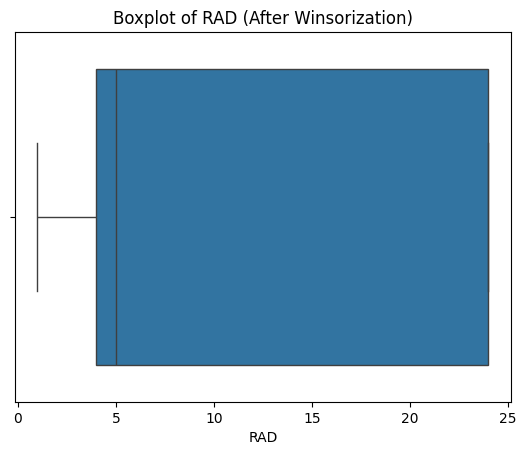

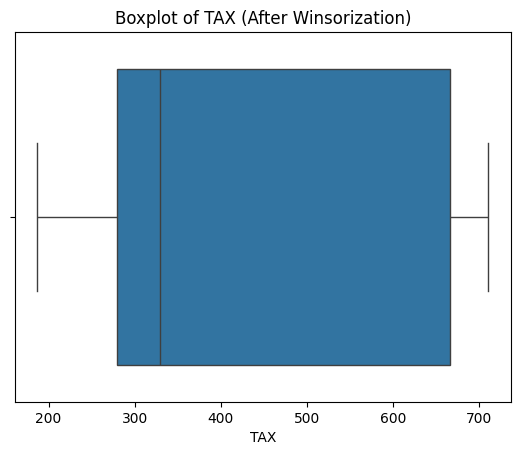

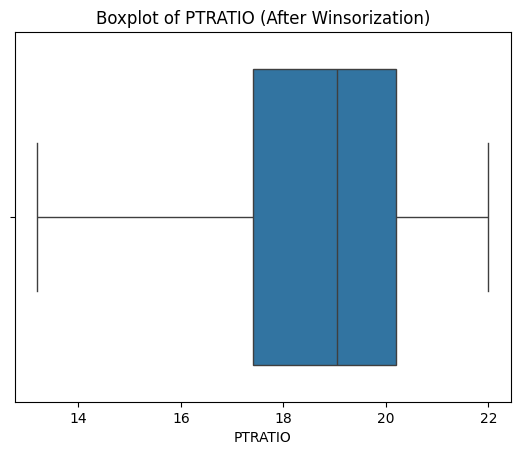

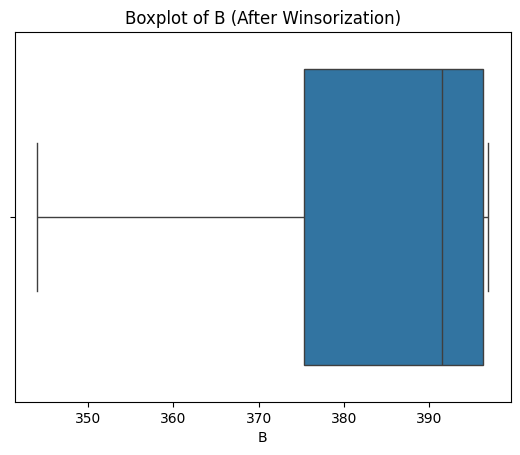

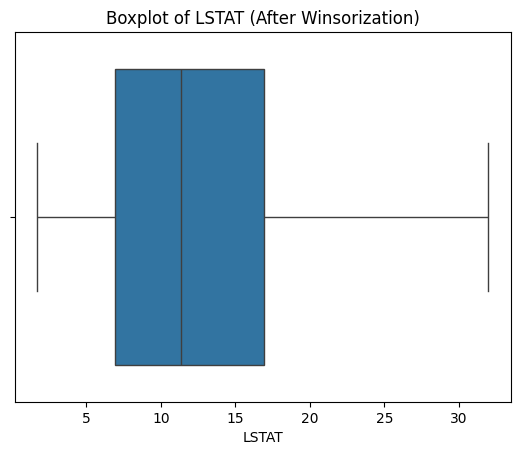

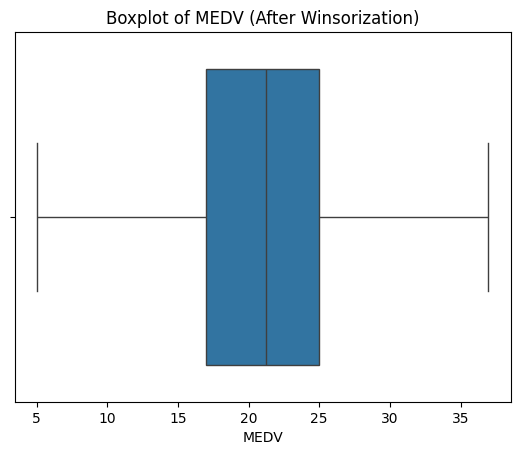

In [34]:
#Handle outliers
# Winsorization means means replacing values below a lower threshold with the value at that threshold,and the same for values above an upper threshold
data_clean=data.copy()

for col in column_names:
  Q1=data_clean[col].quantile(0.25)
  Q3=data_clean[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  # Winsorize instead of removing outliers
  data_clean[col] = np.clip(data_clean[col], lower_bound, upper_bound)

# Show shape before and after
print("Original shape:", data.shape)
print("Shape after outlier treatment:", data_clean.shape)

# Boxplots after treating outliers
for col in column_names:
    plt.figure()
    sns.boxplot(x=data_clean[col])
    plt.title(f"Boxplot of {col} (After Winsorization)")
    plt.show()

### **3. Feature Engineering**

In [35]:
#Split the data into X(features)and y(target)
X = data_clean.drop('MEDV', axis=1)
y = data_clean['MEDV']

#Features
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM  AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575   65  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421   78  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185   61  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998   45  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147   54  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...  ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593   69  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120   76  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976   91  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794   89  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030   80  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83 

In [36]:
#Target
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


### **4. Standardize the data**

In [37]:
# Apply Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### **5. Split the Dataset**

In [38]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [39]:
#Shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (354, 13)
X_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


### **6. Model Training**

In [49]:
#Training Linear Regression model
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='r2')
print("Average R²:", scores.mean())


# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("\nLinear Regression Model Evaluation")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.4f}")

Average R²: 0.563396419289449

Linear Regression Model Evaluation
Mean Squared Error (MSE): 12.35
R-squared (R² Score): 0.7586


In [50]:
# Show coefficients with feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print(coefficients)


    Feature   Coefficient
0      CRIM -2.192176e+00
1        ZN  4.968894e-01
2     INDUS  6.279506e-02
3      CHAS -4.440892e-16
4       NOX -1.176341e+00
5        RM  2.018098e+00
6       AGE -4.997670e-01
7       DIS -2.221854e+00
8       RAD  2.582935e+00
9       TAX -1.236219e+00
10  PTRATIO -1.687185e+00
11        B  2.780368e-01
12    LSTAT -3.463547e+00


### **7. Predictive Analysis**

   Actual  Predicted
0    23.6  27.738224
1    32.4  32.162772
2    13.6  15.498579
3    22.8  25.449848
4    16.1  18.157913
5    20.0  22.611715
6    17.8  17.818070
7    14.0  14.252702
8    19.6  22.031478
9    16.8  20.898927


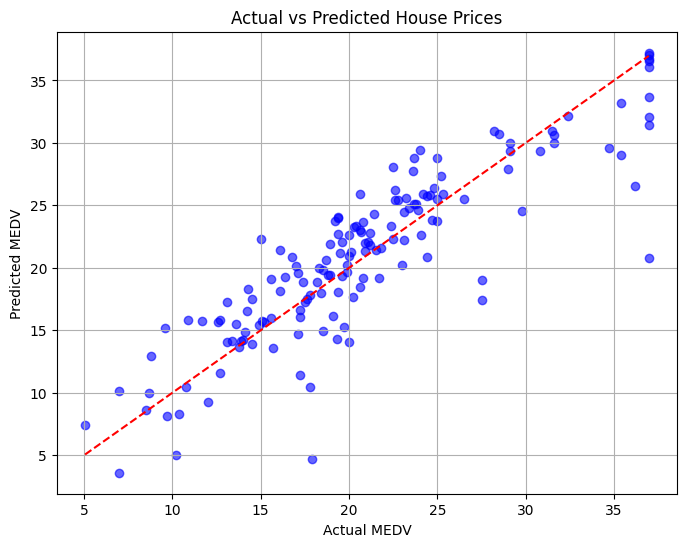

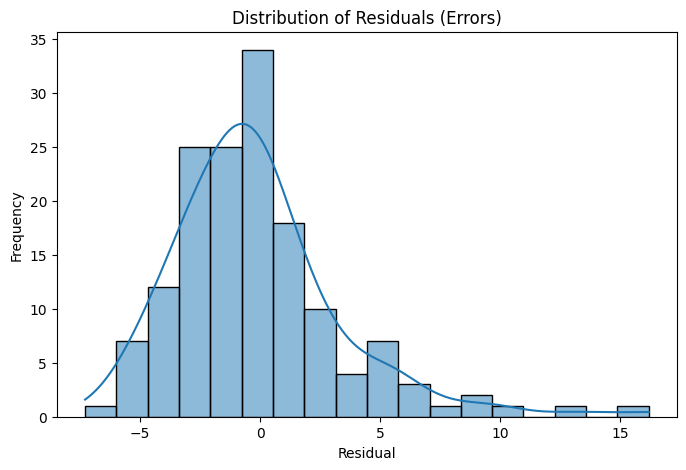

In [51]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Compare Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 predictions

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()



* The output shows that Linear Regression model predicts house prices accurately. The table compares actual vs predicted prices for a few samples, and the scatter plot visualizes this across the test set. Most blue dots lie close to the red dashed line (ideal predictions), indicating strong model performance with low error. The model effectively captures the relationship between features and house prices.

In [52]:

# Make sure the model and scaler are already defined and trained
# model = LinearRegression().fit(X_train, y_train)
# scaler = StandardScaler().fit(X)

# Feature names in order
features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

print("\nEnter the values for a new house to predict its price:")
user_input = []

# Collecting input for all 13 features
for feature in features:
    while True:
        try:
            value = float(input(f"{feature}: "))
            user_input.append(value)
            break
        except ValueError:
            print(f"Invalid input. Please enter a numerical value for {feature}.")

# Convert input to NumPy array and reshape
user_input_array = np.array(user_input).reshape(1, -1)

# Scale the input using the same scaler used for training
user_input_scaled = scaler.transform(user_input_array)

# Predict using the trained model
predicted_price = lr_model.predict(user_input_scaled)

# Output the result
print(f"\nPredicted house price: ${predicted_price[0]*1000:.2f}")



Enter the values for a new house to predict its price:
CRIM: 0.02731
ZN: 0.0
INDUS: 7.07
CHAS: 0
NOX: 0.469
RM: 6.421
AGE: 78
DIS: 4.9671
RAD: 2
TAX: 242.0
PTRATIO: 17.8
B: 	396.90
LSTAT: 9.14

💰 Predicted house price: $24385.30
